<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-09/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ziedny Bisma Mubarok**

**TI-3H/30**

**2141720117**


# Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


In [44]:
def image_dilatation (F, w):
  #size image
  height, width = F.shape

  img_dilatasi = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element dilasi
  sed = np.ones ((w, w), dtype=np.uint8)
  cons1 = (w-1)//2

  # Proses dilasi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i-cons1:i+cons1+1, j-cons1:j+cons1+1]
      product = temp*sed
      img_dilatasi[i, j] = np.max(product)
  return img_dilatasi


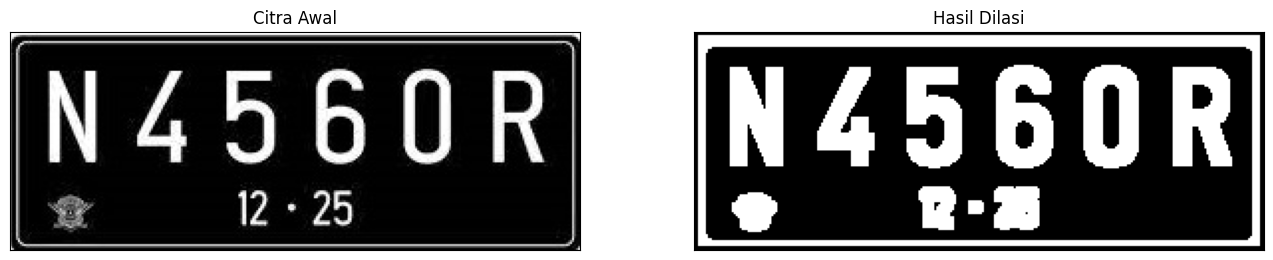

In [45]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 125, 200, cv2.THRESH_BINARY)
w=5

img_dilatasi = image_dilatation(thresh, w)

plt.figure(figsize=(25, 10))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_dilatasi, cmap='gray')
plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini

[[1 1 1]
 [1 1 1]
 [1 1 1]]


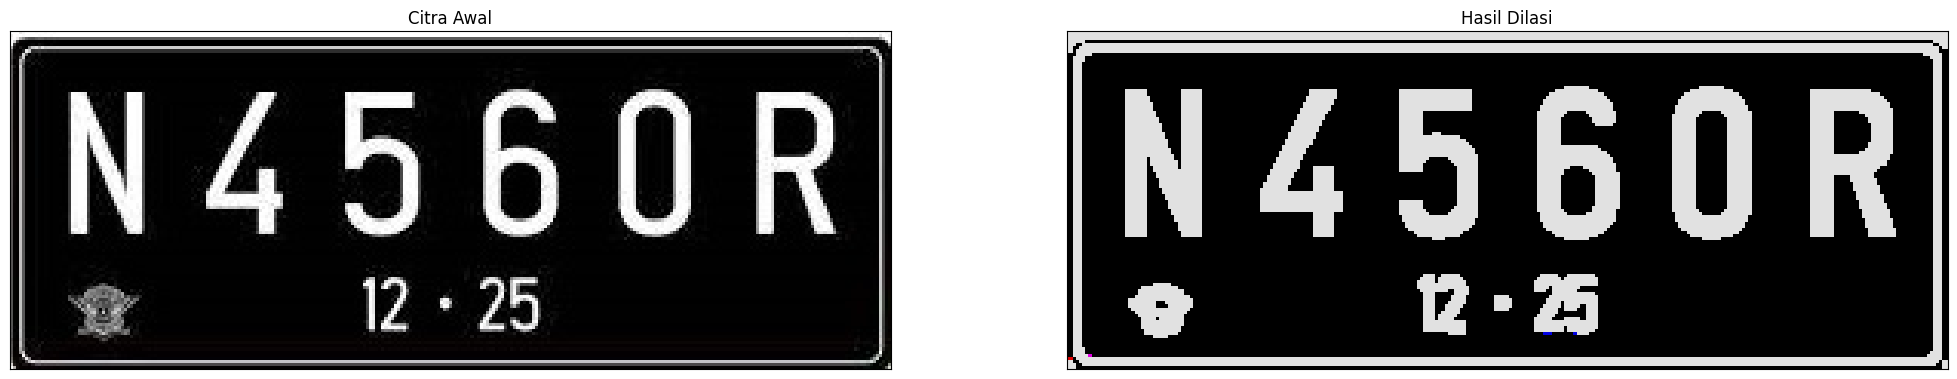

In [46]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg')

ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)

print(kernel)

plt.figure(figsize=(25, 10))

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [47]:
def image_erotion(F, k):
	height, width = F.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SEE
	SEE = np.ones((k,k), dtype=np.uint8)
	c = int((k-1)/2)

	# Erosion
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SEE
			output_image[i,j] = np.min(product)

	return output_image

<ipython-input-48-98a6c040b8b4>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


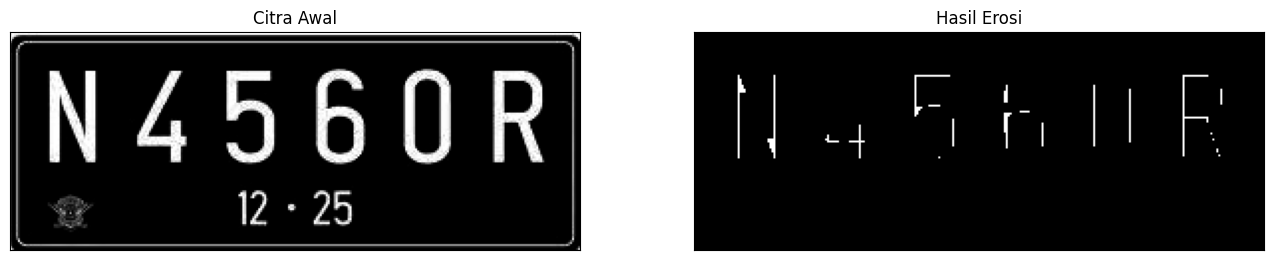

In [48]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
	for x in range(img.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
k = 5
output_image = image_erotion(thresh,k)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


<ipython-input-49-3436660ecccb>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


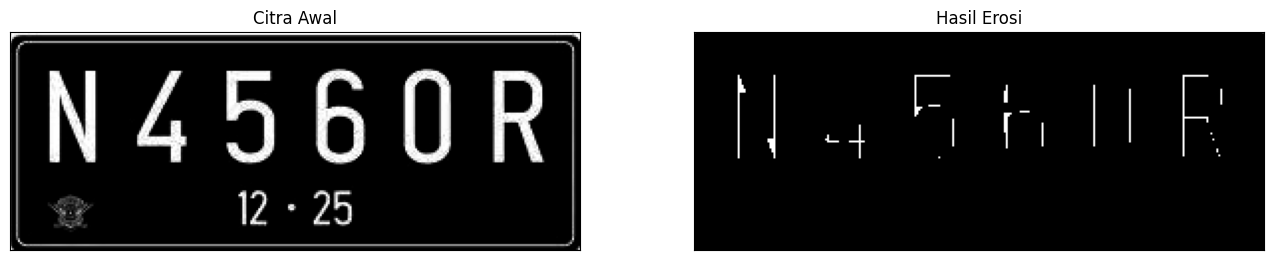

In [49]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
output_image = cv2.erode(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


<ipython-input-50-be55b836f992>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


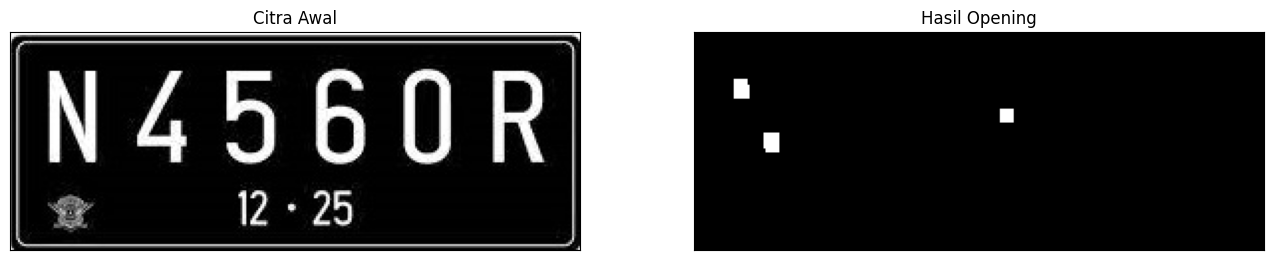

In [50]:
img= cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
reto, thresho = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
k=7
imgO = image_dilatation(image_erotion(thresho,k),k)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

**Menggunakan Liblary**

<ipython-input-51-789afea0b4b4>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


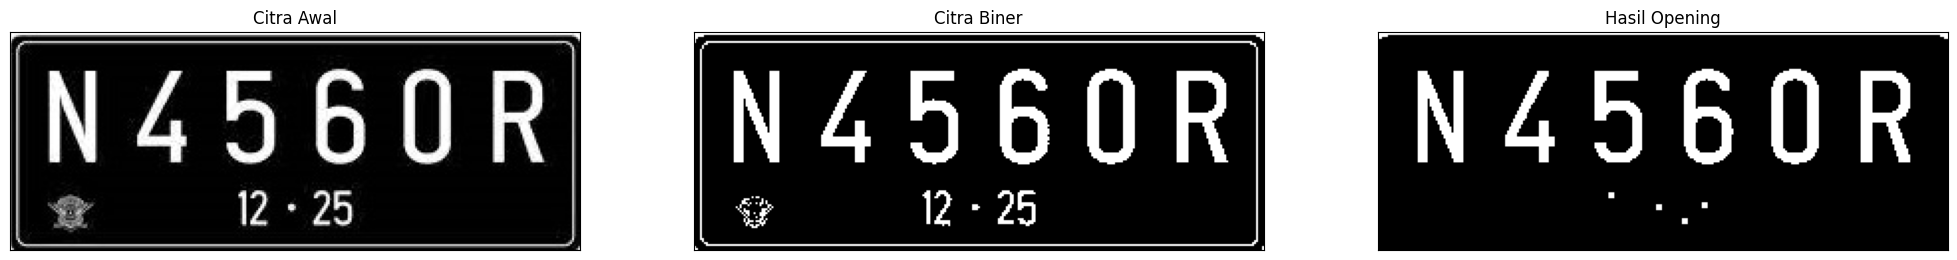

In [51]:

img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:


**operasi closing tanpa library morphology**

<ipython-input-75-51ab072a53f2>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


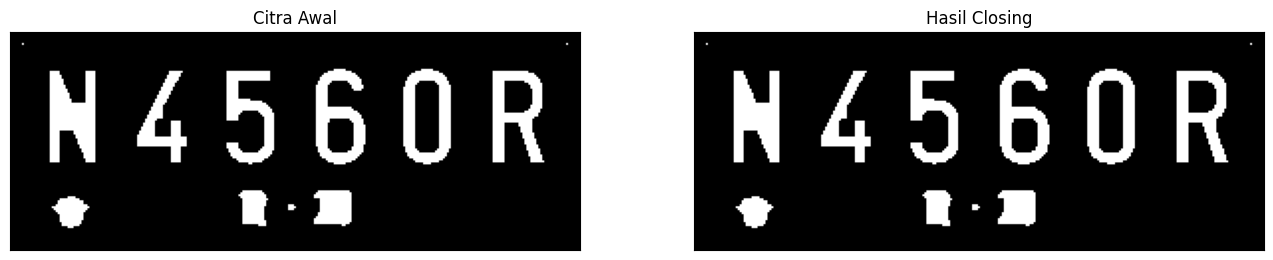

In [75]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
k=7

img = image_erotion(image_dilatation(thresho,k),k)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.title('Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()

**operasi closing dengan library morpholog**

<ipython-input-76-440ca388921b>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


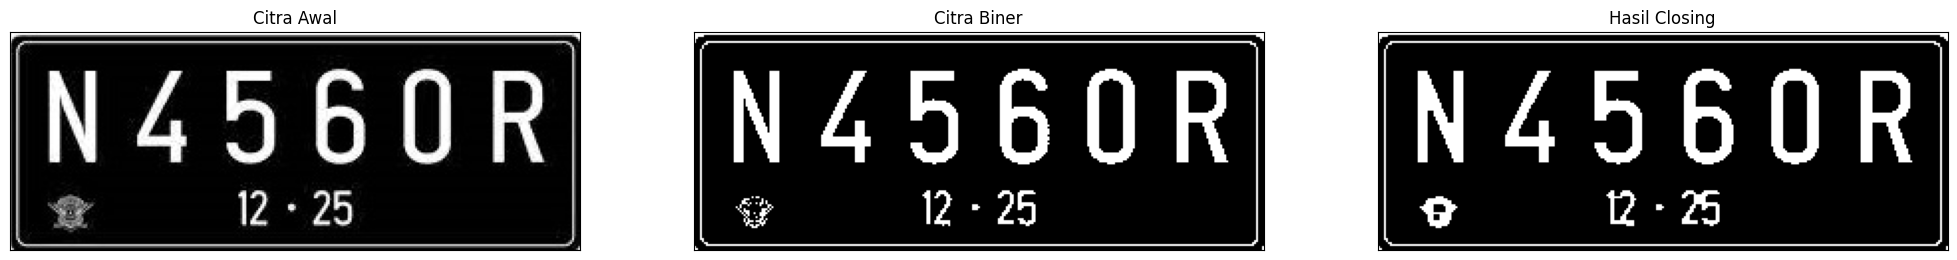

In [76]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [77]:
def dilasi_citra(F,w):
  p,q= F.shape
  img= np.zeros((p,q), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      img[i,j]= np.max(product)
  return img


SED = Cross 3


<ipython-input-78-71867664f02b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


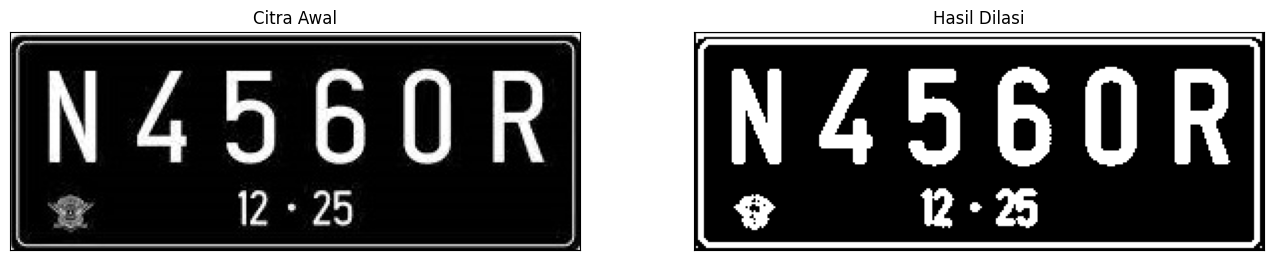

In [78]:
print('SED = Cross 3')
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
w=3
img_dilatasi = dilasi_citra(thresh,w)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_dilatasi,cmap = 'gray')
plt.title('Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()





In [79]:
def dilasi_citra(F,w):
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD


SED = Cross 5


<ipython-input-80-ea06b7e55da8>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img,cmap = 'gray')


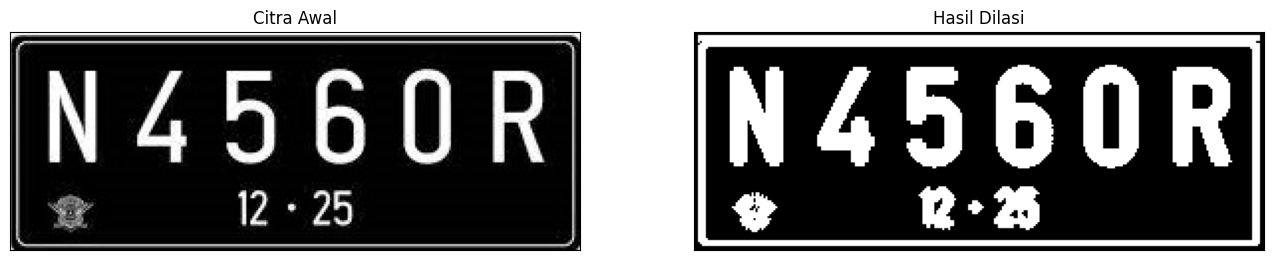

In [80]:
print('SED = Cross 5')
img= cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 225,
cv2.THRESH_BINARY)
w=5
img_dilatasi = dilasi_citra(thresh,w)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_dilatasi,cmap = 'gray')
plt.title('Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

[]

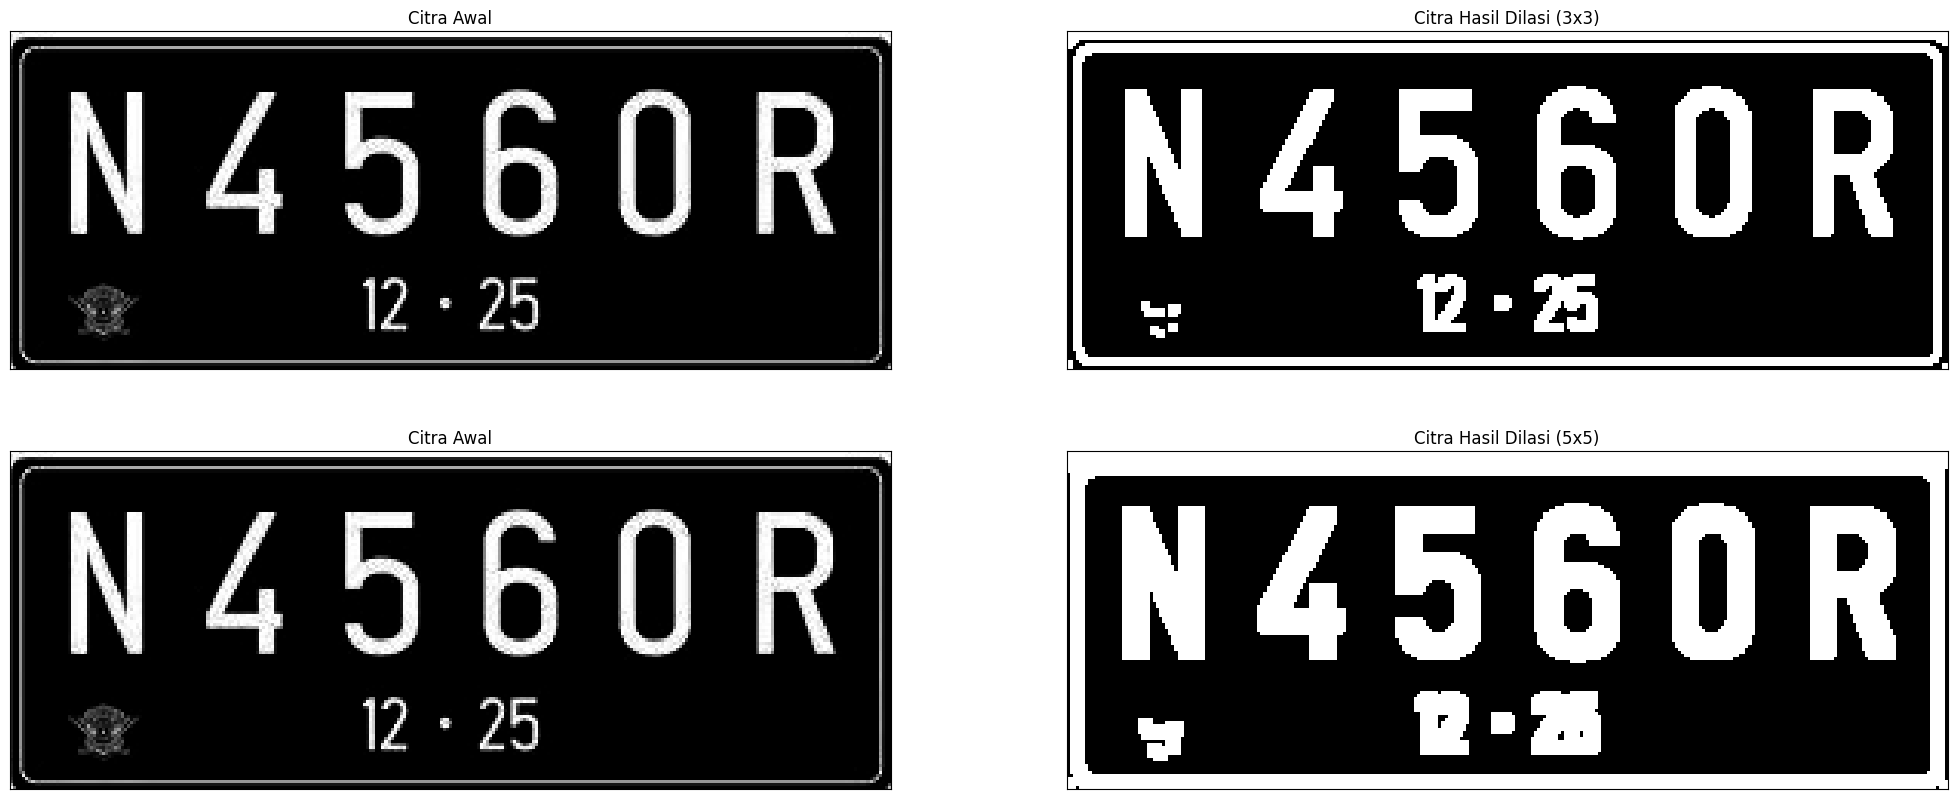

In [82]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,3),np.uint8)
kernel_5 = np.ones((5,5),np.uint8)
output_3 = cv2.dilate(thresh,kernel_3,iterations = 1)
output_5 = cv2.dilate(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])



11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


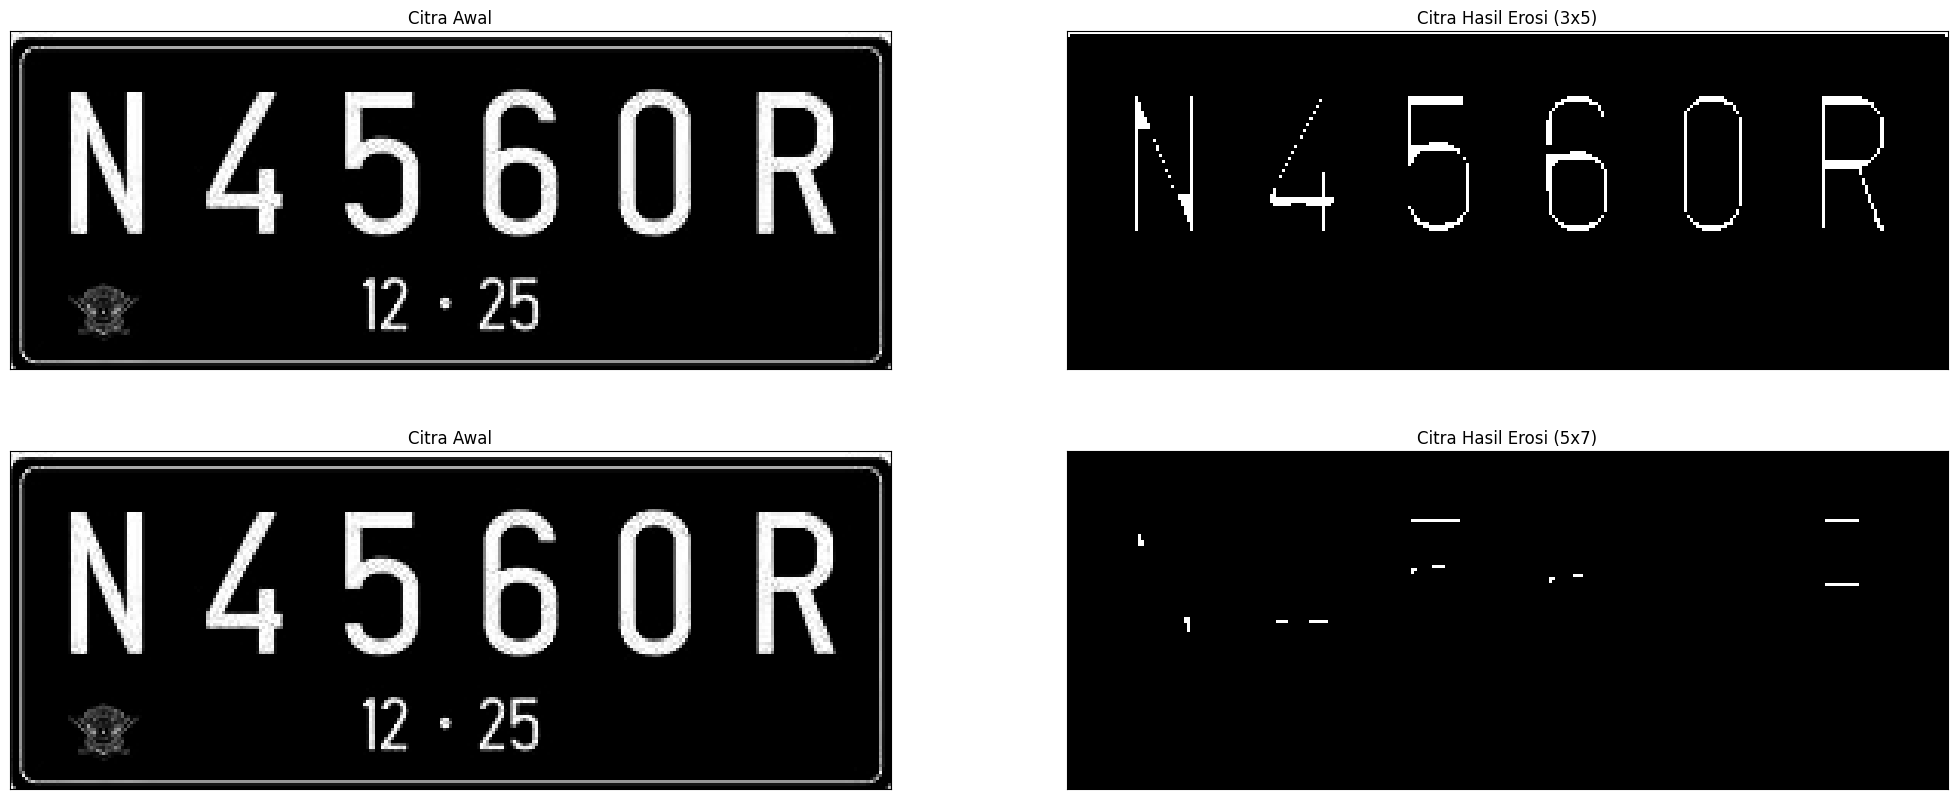

In [83]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,5),np.uint8)
kernel_5 = np.ones((5,7),np.uint8)
output_image_3 = cv2.erode(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.erode(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))
axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi (3x5)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi (5x7)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

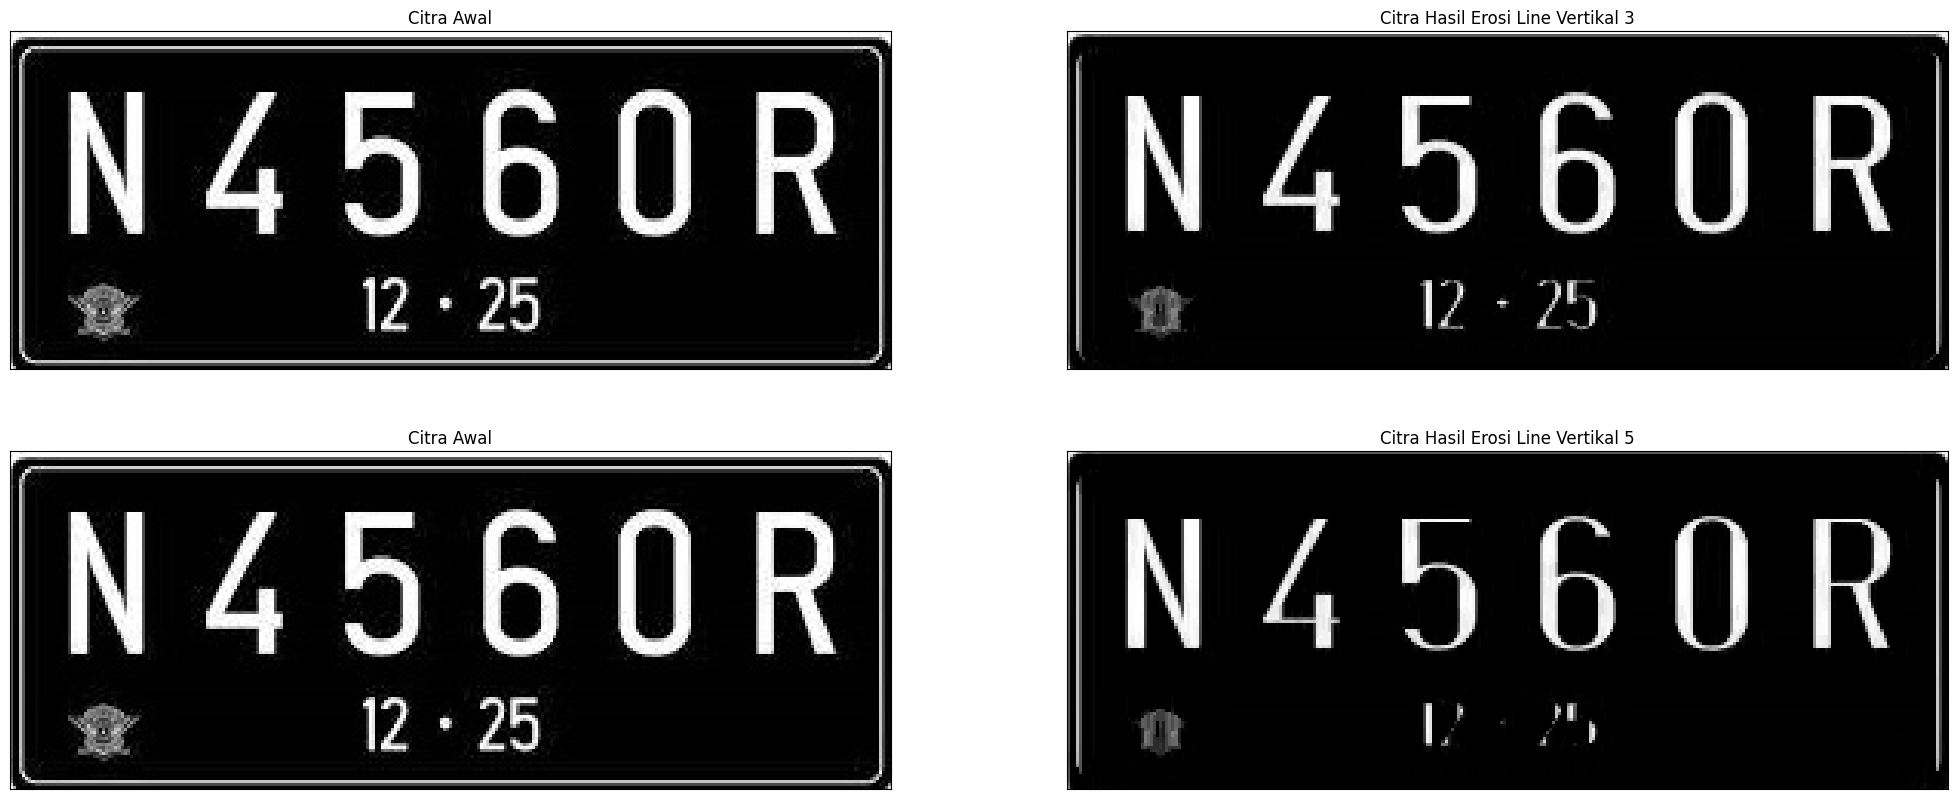

In [86]:
image = cv2.imread('/content/drive/MyDrive/pcvk-resources/plat nomer.jpg', 0)

vertical_line_3 = np.ones((3,1), dtype=np.uint8)
vertical_line_5 = np.ones((5,1), dtype=np.uint8)

eroded_img_3 = cv2.erode(image, vertical_line_3, iterations=1)
eroded_img_5 = cv2.erode(image, vertical_line_5, iterations=1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 1].imshow(eroded_img_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].imshow(eroded_img_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi Line Vertikal 5')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

13. TopHat

<ipython-input-88-3715650a5ddf>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY), cmap='gray')


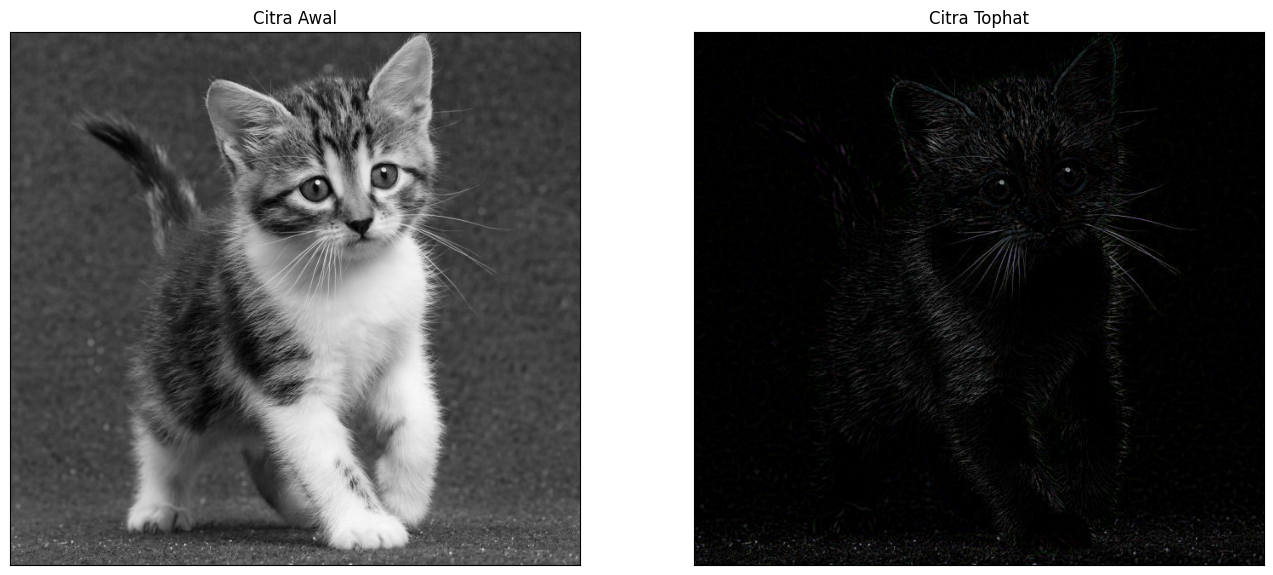

In [88]:
cat_img = cv2.imread('/content/drive/MyDrive/pcvk-resources/kitten01.jpg')
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(cat_img, cv2.MORPH_TOPHAT, kernel)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat)
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()


14. BLACKHAT

<ipython-input-89-dd5a3478f6b6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY), cmap='gray')


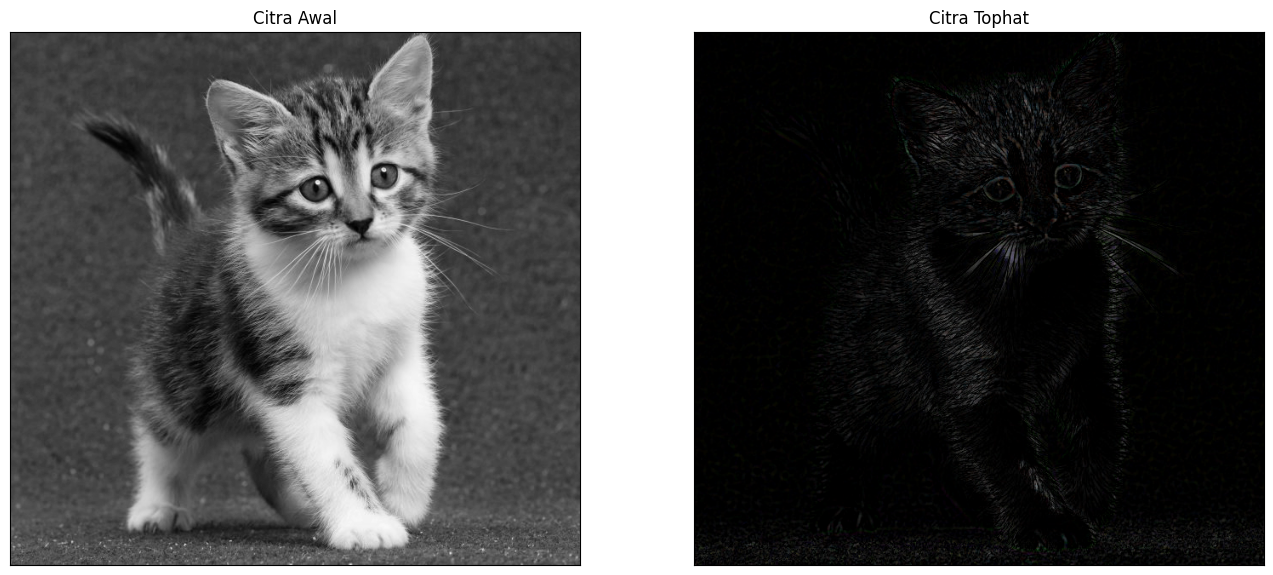

In [89]:
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(cat_img, cv2.MORPH_BLACKHAT, kernel)

plt.subplots(figsize=(25, 10))
plt.subplot(131),plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat)
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

In [90]:
def skeleton(lily_img):
    ret, lily_img = cv2.threshold(lily_img, 127, 255, cv2.THRESH_BINARY)

    size = np.size(lily_img)
    skel = np.zeros(lily_img.shape, np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    while(True):
        eroded = cv2.erode(lily_img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(lily_img, temp)
        skel = cv2.bitwise_or(skel, temp)
        lily_img = eroded.copy()

        gray_image = cv2.cvtColor(lily_img, cv2.COLOR_BGR2GRAY)
        non_zero_pixels = cv2.countNonZero(gray_image)

        if non_zero_pixels == 0:
            break

    return skel

<ipython-input-91-f8f6190dfddb>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(132),plt.imshow(skel)


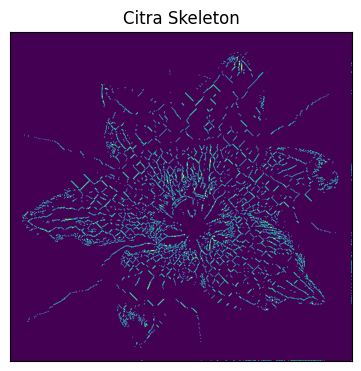

In [91]:
img = cv2.imread('/content/drive/MyDrive/pcvk-resources/lily.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

plt.subplots(figsize=(15, 5))
plt.subplot(132),plt.imshow(skel)
plt.title('Citra Skeleton'),plt.xticks([]), plt.yticks([])
plt.show()

# Tugas

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

In [93]:
!pip install pytesseract

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image